# Bài tập thực hành 2
## Xây dựng cây quyết định và rừng cây trên dữ liệu bệnh tiểu đường

### 1. Tải thư viện và nạp dữ liệu

In [3]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Nạp dữ liệu bệnh tiểu đường từ Kaggle
df = pd.read_csv('diabetes.csv')

# Xem qua dữ liệu
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### 2. Tiền xử lý dữ liệu

In [4]:
# Kiểm tra và xử lý giá trị 0 không hợp lệ (ví dụ: Glucose, BloodPressure, BMI không thể là 0)
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_replace:
    df[column] = df[column].replace(0, df[column].median())

# Tách đặc trưng (X) và nhãn (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Chia dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Xây dựng và huấn luyện mô hình Cây quyết định

In [5]:
# Khởi tạo và huấn luyện mô hình Cây quyết định
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Đánh giá mô hình
train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)
print(f"Decision Tree Training Accuracy: {train_score:.2f}")
print(f"Decision Tree Testing Accuracy: {test_score:.2f}")

Decision Tree Training Accuracy: 0.78
Decision Tree Testing Accuracy: 0.76


### 4. Hiển thị Cây quyết định (dùng graphviz)

In [6]:
# Xuất cây quyết định thành định dạng DOT
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dt, out_file=None, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("diabetes_decision_tree", view=True)  # Lưu và hiển thị cây (cần cài graphviz)

'diabetes_decision_tree.pdf'

### 5. Xây dựng và huấn luyện mô hình Rừng cây (Random Forest)

In [7]:
# Khởi tạo và huấn luyện mô hình Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Đánh giá mô hình
train_score_rf = rf.score(X_train, y_train)
test_score_rf = rf.score(X_test, y_test)
print(f"Random Forest Training Accuracy: {train_score_rf:.2f}")
print(f"Random Forest Testing Accuracy: {test_score_rf:.2f}")

Random Forest Training Accuracy: 0.85
Random Forest Testing Accuracy: 0.76


### 6. Tối ưu hóa tham số cho Random Forest (GridSearchCV)

In [8]:
# Định nghĩa lưới tham số
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
cv_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_params, cv=5, scoring='accuracy', n_jobs=-1)
cv_rf.fit(X_train, y_train)

# In tham số tốt nhất
print("Best parameters:", cv_rf.best_params_)

# Đánh giá mô hình với tham số tối ưu
best_rf = cv_rf.best_estimator_
test_score_best_rf = best_rf.score(X_test, y_test)
print(f"Best Random Forest Testing Accuracy: {test_score_best_rf:.2f}")

Best parameters: {'max_depth': 5, 'n_estimators': 200}
Best Random Forest Testing Accuracy: 0.77


### 7. Vẽ biểu đồ mức độ quan trọng của các đặc trưng

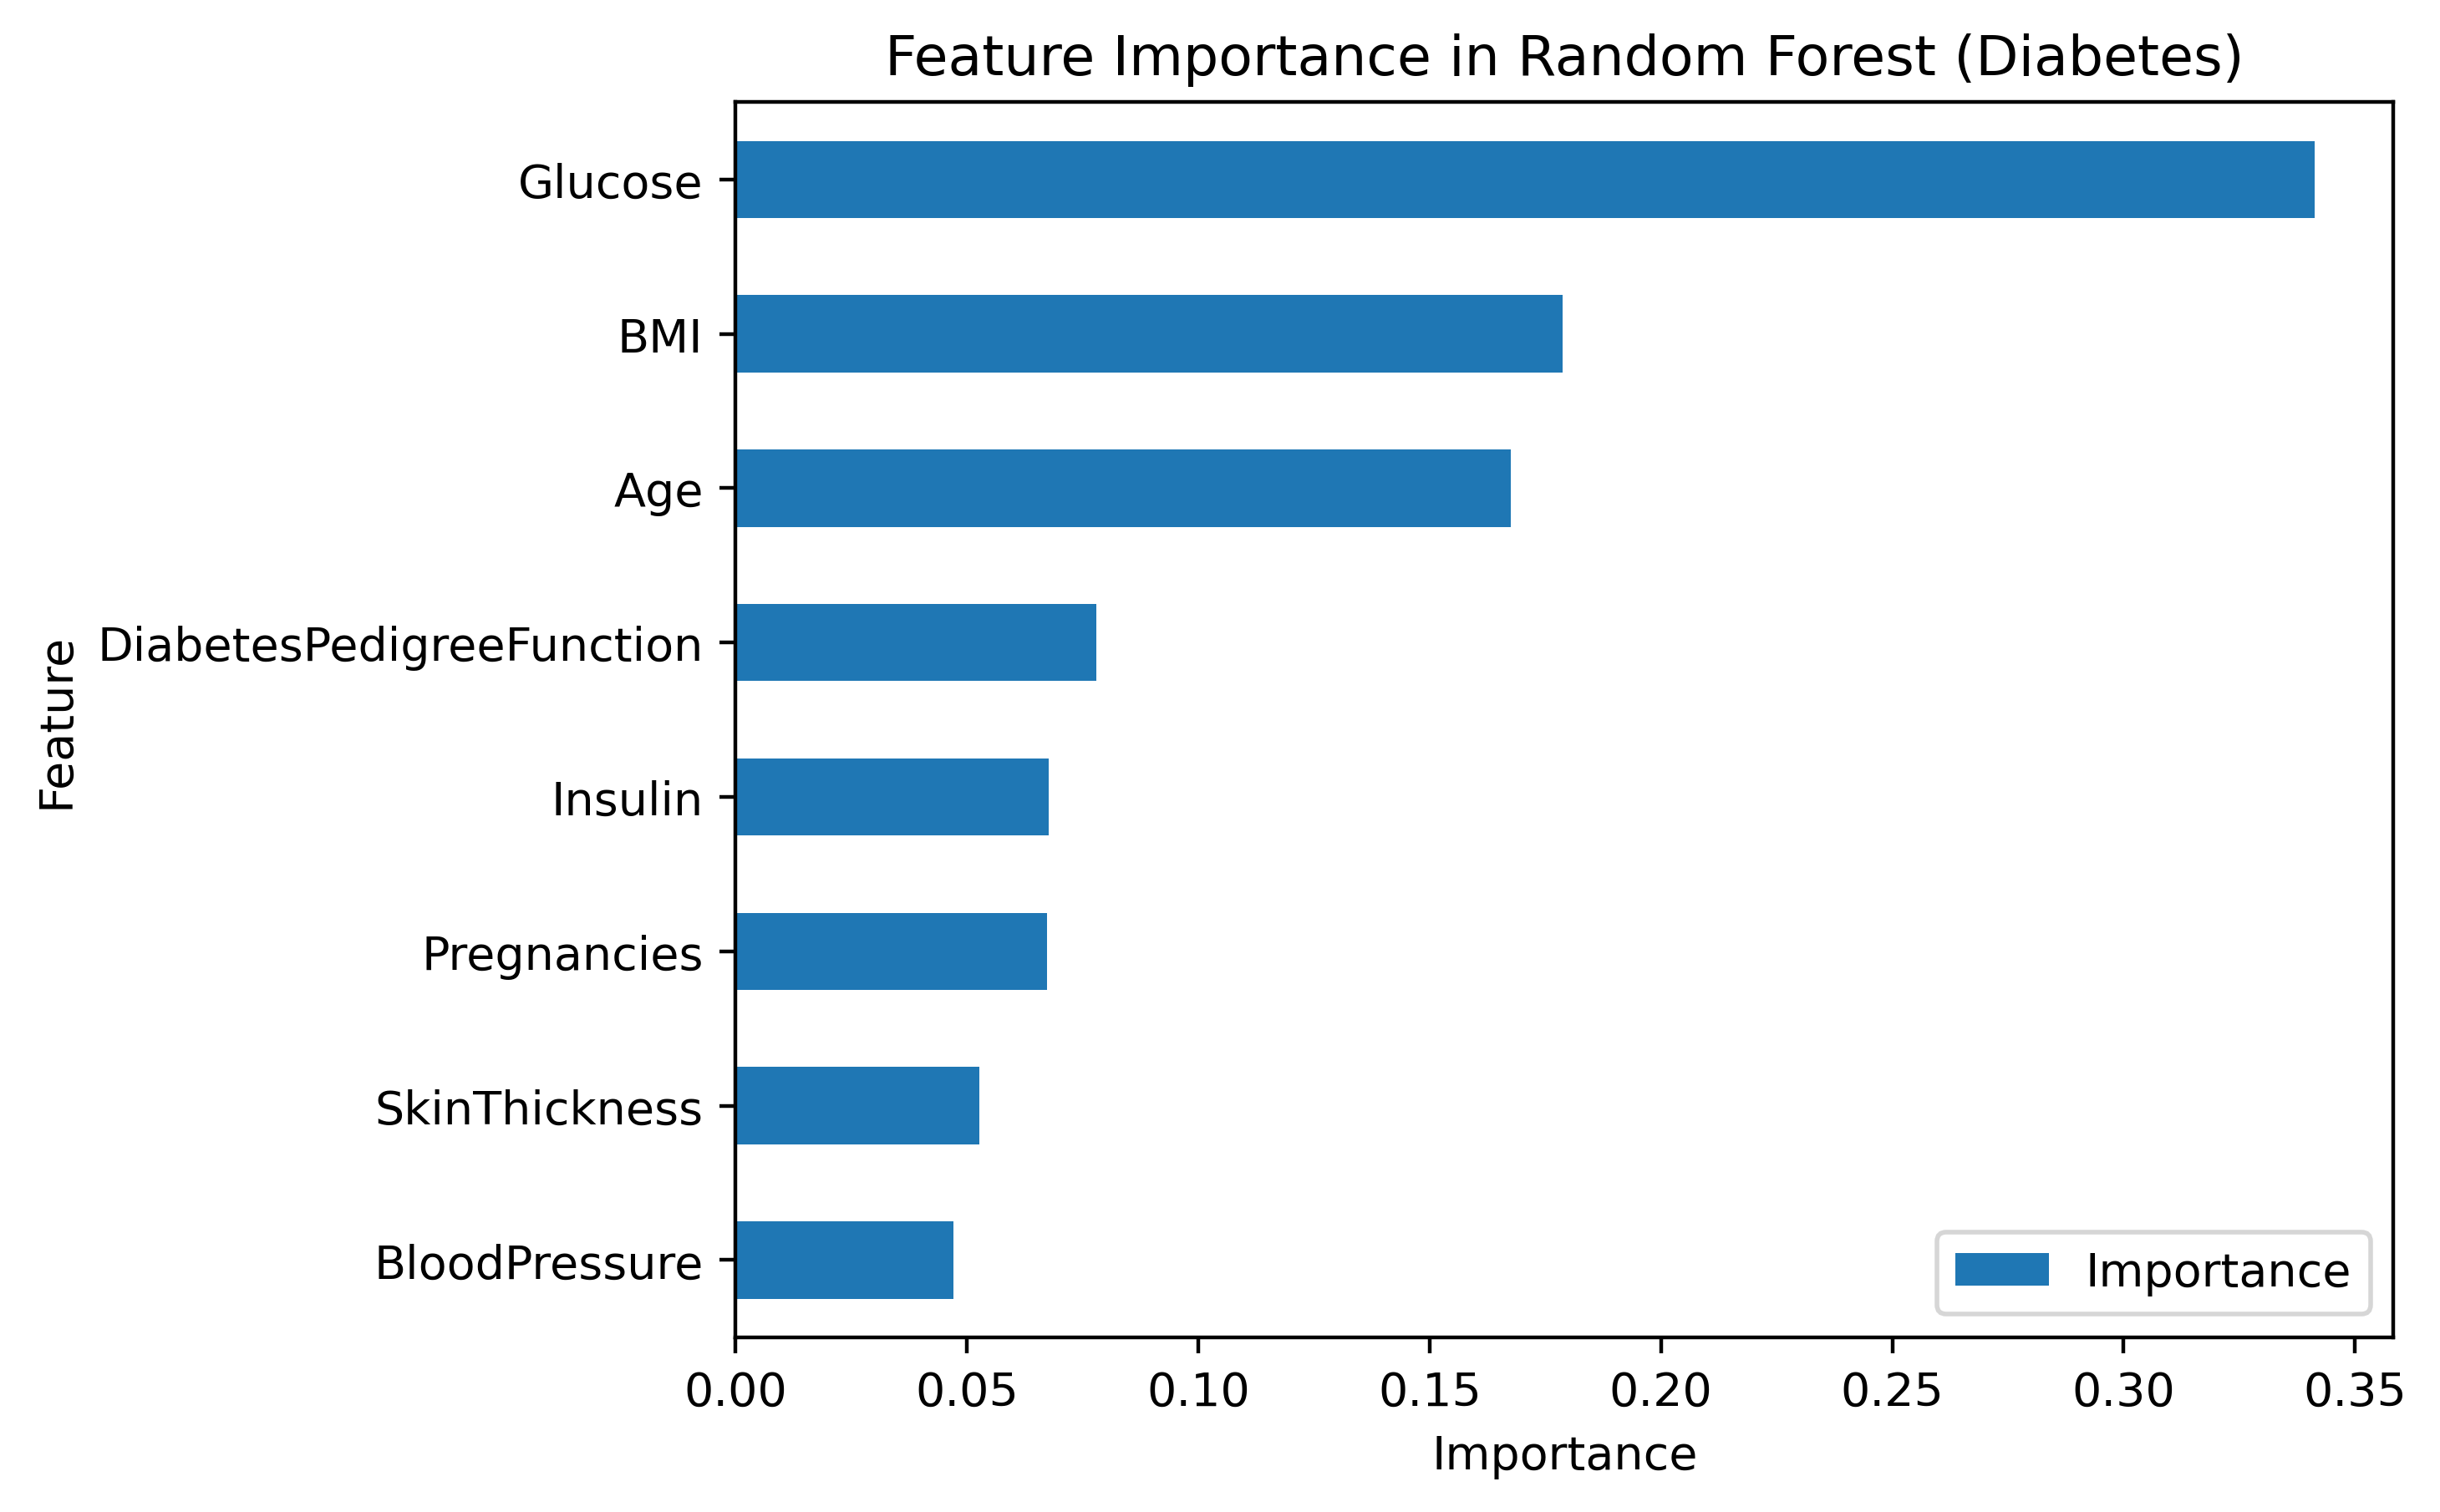

In [9]:
# Tạo DataFrame cho mức độ quan trọng
feat_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_rf.feature_importances_})
feat_importance = feat_importance.sort_values('Importance', ascending=True)

# Vẽ biểu đồ
feat_importance.plot.barh(x='Feature', y='Importance')
plt.title('Feature Importance in Random Forest (Diabetes)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()